<a href="https://colab.research.google.com/github/danipequito/PqtoRep/blob/main/%5BAula07%5DRegress%C3%A3oLog%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Disciplina: IA Aplicada a Saúde!
##### UFMS

# **O projeto de aprendizado de máquina de ponta a ponta**
## Imagine que você é o profissional responsável pela execução de um projeto de aprendizado de máquina (AM) e inteligência artificial (AI) de um importante hospital. Você foi contratado para liderar uma equipe para a criação de modelos de AM para a predição da mortalidade e internação dos pacientes que estão hospitalizados com o diagnóstico de Síndrome Respiratória Aguda Grave (SRAG), incluindo infecção por Sars-Cov-2.

- Para isso, você dispõe de uma base de dados contendo diversas características clínicas, fatores de risco e sociodemográficas.
- Como você executaria este projeto do começo ao fim?

## Vamos por partes:
- Primeiro, você precisa entender o problema que você precisa resolver;
- Segundo, entender a base e dados: executar técnicas de análise exploratória e visualização de dados, incluindo alguns testes estatísticos;
- Terceiro, estudar os principais algoritmos que podem ser utilizados para cada problema a ser resolvido: será um AM supervisionado? Será feita classificação ou regressão?
- Quarto, precisa realizar o pré-processamento dos dados de acordo com cada modelo que você deseja construir;
- Quinto, você necessita treinar o modelo;
- Sexto, ajustar o modelo;
- Sétimo, testar e validar seu modelo;
- Oitavo, apresentar seus resultados para a diretoria do hospital;
- Nono, implementar, monitorar e manter a aplicação desenvolvida.

# **Como conduzir um projeto de AM e IA?**
## 1. Importar e preparar o dataset;
## 2. Pré-processamento dos dados;
### 2.1 Verificação de dados faltantes;
### 2.2 Verificação dos tipos de dados;
### 2.3 Verificação das dimensões do dataset;  
### 2.4 Criação de novas variáveis;
### 2.5 Ajuste das variáveis categóricas;
### 2.6 Normalização das variáveis contínuas;
##  3. Análise exploratória dos dados;
## 4. Divisão do dataset em treino e teste;
## 5. Definição dos algoritmos a serem utilizados;
## 6. Otimização dos algoritmos (seleção dos melhores hiperparâmetros);
## 7. Treinamento dos algoritmos;
## 8. Validação dos modelos;
## 9. Avaliação das métricas de performance;
## 10. Plotagem de curvas para interpretação dos modelos: curvas ROC, curvas de validação e de calibração;
## 11. Aplicação de novos dados ao modelo escolhido;

# **Objetivo do projeto: prever o desfecho de SRAG, em pacientes hospitalizados.**
## **Tipo de AM**: supervisionado;
## **Tipo de tarefa de AM**: classificação binária.

## Carregando a base de dados pré-processada

In [ ]:
# carregando a base de dados contendo todas as gestanes, não gestantes e puérperas
from google.colab import files
uploaded = files.upload()

Saving Dataset final IA na saúde [31.08.23].csv to Dataset final IA na saúde [31.08.23].csv


In [ ]:
import pandas as pd
df = pd.read_csv('Dataset final IA na saúde [31.08.23].csv')
df.head()

,Unnamed: 0,CS_SEXO,NU_IDADE_N,CS_GESTANT,CS_RACA,FEBRE,TOSSE,DISPNEIA,DESC_RESP,SATURACAO,FATOR_RISC,UTI,SUPORT_VEN,PCR_RESUL,CLASSI_FIN,EVOLUCAO,VACINA_COV,FNT_IN_COV
0,0,M,21,6,4,2.0,2.0,2.0,2.0,2.0,1,2.0,3.0,5.0,4.0,1.0,1.0,2
1,1,M,86,6,1,1.0,2.0,1.0,1.0,1.0,1,2.0,2.0,2.0,4.0,1.0,1.0,2
2,2,M,11,6,4,1.0,1.0,1.0,1.0,1.0,1,2.0,2.0,2.0,4.0,1.0,1.0,2
3,3,F,93,5,1,2.0,1.0,2.0,2.0,2.0,2,2.0,3.0,4.0,4.0,1.0,1.0,2
4,4,M,87,6,1,2.0,1.0,1.0,2.0,1.0,2,2.0,2.0,2.0,5.0,2.0,1.0,2


# **Antes de iniciar as tarefas de AM, precisamos preparar os dados para os algoritmos.**
- A maior parte das nossas variáveis são categóricas, assim precisaremos criar as chamadas variáveis fictícias (*dummies*).


In [ ]:
# vamos retirar a primeira coluna
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
# vamos verificar os tipos de variáveis
df.dtypes

CS_SEXO        object
NU_IDADE_N      int64
CS_GESTANT      int64
CS_RACA         int64
FEBRE         float64
TOSSE         float64
DISPNEIA      float64
DESC_RESP     float64
SATURACAO     float64
FATOR_RISC      int64
UTI           float64
SUPORT_VEN    float64
PCR_RESUL     float64
CLASSI_FIN    float64
EVOLUCAO      float64
VACINA_COV    float64
FNT_IN_COV      int64
dtype: object

In [ ]:
# ajustando as variáveis categóricas
for col in df:
  df[col] = df[col].astype('category')

In [ ]:
df['NU_IDADE_N'] = df['NU_IDADE_N'].astype('int')

In [ ]:
# verificando
df.dtypes

CS_SEXO       category
NU_IDADE_N       int64
CS_GESTANT    category
CS_RACA       category
FEBRE         category
TOSSE         category
DISPNEIA      category
DESC_RESP     category
SATURACAO     category
FATOR_RISC    category
UTI           category
SUPORT_VEN    category
PCR_RESUL     category
CLASSI_FIN    category
EVOLUCAO      category
VACINA_COV    category
FNT_IN_COV    category
dtype: object

In [ ]:
df['NU_IDADE_N'].describe()

count    178380.000000
mean         31.024784
std          32.758110
min          -5.000000
25%           3.000000
50%          10.000000
75%          65.000000
max         123.000000
Name: NU_IDADE_N, dtype: float64

Podemos observar a existência de valores negativos, portanto precisaremos ajustar esta variável.
- Vamos filtrar a base de dados para considerar idades entre 0 - 100 anos.

In [ ]:
df = df.query('NU_IDADE_N >= 0 & NU_IDADE_N <= 100')

In [ ]:
df['NU_IDADE_N'].describe()

count    178188.000000
mean         30.948431
std          32.689934
min           0.000000
25%           3.000000
50%          10.000000
75%          65.000000
max         100.000000
Name: NU_IDADE_N, dtype: float64

In [ ]:
df.dtypes

CS_SEXO       category
NU_IDADE_N       int64
CS_GESTANT    category
CS_RACA       category
FEBRE         category
TOSSE         category
DISPNEIA      category
DESC_RESP     category
SATURACAO     category
FATOR_RISC    category
UTI           category
SUPORT_VEN    category
PCR_RESUL     category
CLASSI_FIN    category
EVOLUCAO      category
VACINA_COV    category
FNT_IN_COV    category
dtype: object

In [ ]:
df['EVOLUCAO'].value_counts()

1.0    155780
2.0     13738
9.0      4643
3.0      4027
Name: EVOLUCAO, dtype: int64

In [ ]:
# vamos retirar os valores referentes a 3.0 e 9.0
df['EVOLUCAO'] = df['EVOLUCAO'].astype('int')
df = df.query('EVOLUCAO >= 1 & EVOLUCAO <= 2')

In [ ]:
df['EVOLUCAO'].value_counts()

1    155780
2     13738
Name: EVOLUCAO, dtype: int64

### Vamos plotar um gráfico para verificar a distribuição de classes

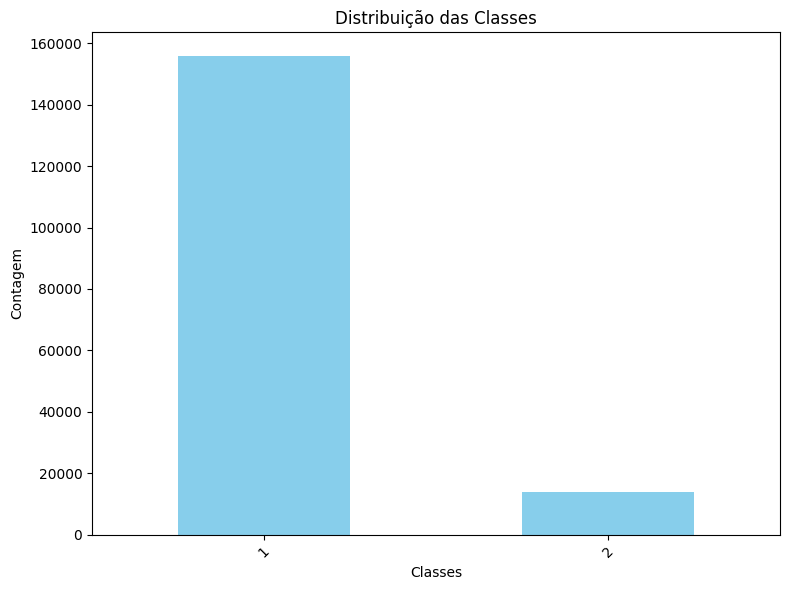

In [ ]:
import matplotlib.pyplot as plt
class_column = 'EVOLUCAO'

# Calcule a contagem de cada classe
class_counts = df[class_column].value_counts()

# Crie um gráfico de barras das distribuições das classes
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Distribuição das Classes')
plt.xlabel('Classes')
plt.ylabel('Contagem')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()
plt.show()

# Vamos categorizar a variável Idade

In [ ]:
# categorizando a variável Idade e criando uma nova variável
classes = [0, 11, 20, 45, 65, 100]
labels = [1, 2, 3, 4, 5]
# segundo estes label, seria: idades entre 0-11 (1 = infância), 12-20 (2 = adolescência), 21-45 (3 = adulto jovem), 46-65 (4 = adulto), 66-100 (5 = idoso)
# idade = pd.cut(x=df_filter_18.NU_IDADE_N, bins=classes, labels=labels)
# df_filter_18['Idade'] = idade
# para o dataset de 2023
idade = pd.cut(x=df.NU_IDADE_N, bins=classes, labels=labels)
df['Idade'] = idade

In [ ]:
# conferindo
df.head()

,CS_SEXO,NU_IDADE_N,CS_GESTANT,CS_RACA,FEBRE,TOSSE,DISPNEIA,DESC_RESP,SATURACAO,FATOR_RISC,UTI,SUPORT_VEN,PCR_RESUL,CLASSI_FIN,EVOLUCAO,VACINA_COV,FNT_IN_COV,Idade
0,M,21,6,4,2.0,2.0,2.0,2.0,2.0,1,2.0,3.0,5.0,4.0,1,1.0,2,3
1,M,86,6,1,1.0,2.0,1.0,1.0,1.0,1,2.0,2.0,2.0,4.0,1,1.0,2,5
2,M,11,6,4,1.0,1.0,1.0,1.0,1.0,1,2.0,2.0,2.0,4.0,1,1.0,2,1
3,F,93,5,1,2.0,1.0,2.0,2.0,2.0,2,2.0,3.0,4.0,4.0,1,1.0,2,5
4,M,87,6,1,2.0,1.0,1.0,2.0,1.0,2,2.0,2.0,2.0,5.0,2,1.0,2,5


In [ ]:
# deletando a variável NU_IDADE_N
df.drop(['NU_IDADE_N'], axis=1, inplace=True)

In [ ]:
# verificando os tipos de dados
df.dtypes

CS_SEXO       category
CS_GESTANT    category
CS_RACA       category
FEBRE         category
TOSSE         category
DISPNEIA      category
DESC_RESP     category
SATURACAO     category
FATOR_RISC    category
UTI           category
SUPORT_VEN    category
PCR_RESUL     category
CLASSI_FIN    category
EVOLUCAO         int64
VACINA_COV    category
FNT_IN_COV    category
Idade         category
dtype: object

In [ ]:
for col in df:
  df[col] = df[col].astype('category')

In [ ]:
# salvando o dataset com a idade categorizada
df.to_csv('Dataset IA Saúde 19.09.23.csv')

In [2]:
# carregando a base de dados contendo todas as gestanes, não gestantes e puérperas
from google.colab import files
uploaded = files.upload()

Saving Dataset IA Saúde 19.09.23.csv to Dataset IA Saúde 19.09.23.csv


In [4]:
import pandas as pd
df = pd.read_csv('Dataset IA Saúde 19.09.23.csv')
df.head()

,Unnamed: 0,CS_SEXO,CS_GESTANT,CS_RACA,FEBRE,TOSSE,DISPNEIA,DESC_RESP,SATURACAO,FATOR_RISC,UTI,SUPORT_VEN,PCR_RESUL,CLASSI_FIN,EVOLUCAO,VACINA_COV,FNT_IN_COV,Idade
0,0,M,6,4,2.0,2.0,2.0,2.0,2.0,1,2.0,3.0,5.0,4.0,1,1.0,2,3.0
1,1,M,6,1,1.0,2.0,1.0,1.0,1.0,1,2.0,2.0,2.0,4.0,1,1.0,2,5.0
2,2,M,6,4,1.0,1.0,1.0,1.0,1.0,1,2.0,2.0,2.0,4.0,1,1.0,2,1.0
3,3,F,5,1,2.0,1.0,2.0,2.0,2.0,2,2.0,3.0,4.0,4.0,1,1.0,2,5.0
4,4,M,6,1,2.0,1.0,1.0,2.0,1.0,2,2.0,2.0,2.0,5.0,2,1.0,2,5.0


In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [8]:
# verificando os tipos de dados
df.dtypes

CS_SEXO       category
CS_GESTANT    category
CS_RACA       category
FEBRE         category
TOSSE         category
DISPNEIA      category
DESC_RESP     category
SATURACAO     category
FATOR_RISC    category
UTI           category
SUPORT_VEN    category
PCR_RESUL     category
CLASSI_FIN    category
EVOLUCAO      category
VACINA_COV    category
FNT_IN_COV    category
Idade         category
dtype: object

In [7]:
# ajustando os tipos de variáveis
for col in df:
  df[col] = df[col].astype('category')

# Inicialmente, precisaremos realizar a divisão dos dados em treino e teste.
- Isto possibilita que nosso dataset fique dividido em duas partes: uma parte para o treinamento dos modelos (70% dos dados) e uma parte para a avaliação final dos modelos (dados de teste, 30%).
- Para isso, utilizaremos o módulo "model_selection" que implementa a função train_test_split para esta divisão.

In [9]:
# vamos dividir os dados em x (variáveis de entrada) e y (variável-alvo)
x = df.drop(['EVOLUCAO'], axis=1)
y = df['EVOLUCAO']

In [10]:
# importando a função
from sklearn.model_selection import train_test_split

In [11]:
# realizando a divisão dos dados
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=7)

**Os algoritmos precisam receber valores numéricos, então usaremos a codificação numérica para ajustá-los.**

In [12]:
# gerando variáveis dummies para as variáveis de entrada nos dados de treinamento
X_treino = pd.get_dummies(x_treino)
X_treino.head()

,CS_SEXO_F,CS_SEXO_I,CS_SEXO_M,CS_GESTANT_0,CS_GESTANT_1,CS_GESTANT_2,CS_GESTANT_3,CS_GESTANT_4,CS_GESTANT_5,CS_GESTANT_6,...,VACINA_COV_1.0,VACINA_COV_2.0,VACINA_COV_9.0,FNT_IN_COV_1,FNT_IN_COV_2,Idade_1.0,Idade_2.0,Idade_3.0,Idade_4.0,Idade_5.0
145898,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,1,0,0,0,0
40137,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
36916,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
132421,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,1,1,0,0,0,0
28053,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,1,1,0,0,0,0


In [13]:
# gerando variáveis dummies para as variáveis de entrada nos dados de teste
X_teste = pd.get_dummies(x_teste)
X_teste.head()

,CS_SEXO_F,CS_SEXO_I,CS_SEXO_M,CS_GESTANT_0,CS_GESTANT_1,CS_GESTANT_2,CS_GESTANT_3,CS_GESTANT_4,CS_GESTANT_5,CS_GESTANT_6,...,VACINA_COV_1.0,VACINA_COV_2.0,VACINA_COV_9.0,FNT_IN_COV_1,FNT_IN_COV_2,Idade_1.0,Idade_2.0,Idade_3.0,Idade_4.0,Idade_5.0
11228,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,1,0,0,0,0
1770,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
82467,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
50110,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,1,0,0,0,0
140900,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,1,0,0,0,0


##**Precisamos codificar também nossos dados de saída, a variável-alvo.**

- Para isso, utilizaremos o módulo "preprocessing" que implementa a função Label Encoder (para codificação numérica da variável-alvo).

In [14]:
# importando a função
from sklearn.preprocessing import LabelEncoder

In [15]:
# realizando a codificação da variável-alvo
# definindo o codificador
le = LabelEncoder()
# ajustando e codificando nos dados de treino
y_treino = le.fit_transform(y_treino)
# codificando nos dados de teste
y_teste = le.transform(y_teste)

In [16]:
import numpy as np
# conferindo
print(np.unique(y_treino))
print(np.unique(y_teste))

[0 1]
[0 1]


# **Vamos utilizar o modelo Regressão Logística**
- Para isso, utilizaremos a biblioteca sckit-learn (sklearn). Esta biblioteca implementa o classificador de regressão logística, chamado **LogisticRegression**.

## **Qual será o objetivo desta tarefa?**
- Prever a evolução (desfecho) de SRAG.

In [17]:
# importando o classificador
from sklearn.linear_model import LogisticRegression

In [18]:
# definindo o algorito
algoritmo = LogisticRegression()

In [19]:
# treinando o algoritmo
algoritmo.fit(X_treino, y_treino)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
# fazendo as previsões de classe
y_pred = algoritmo.predict(X_teste)

In [21]:
# visualizando as previsões de classe
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
# fazendo as previsões de probabilidade de classe
y_proba_pred = algoritmo.predict_proba(X_teste)

In [23]:
# visualizando as previsões de probabilidade de classe
y_proba_pred

array([[0.98865135, 0.01134865],
       [0.84653305, 0.15346695],
       [0.81169148, 0.18830852],
       ...,
       [0.99403751, 0.00596249],
       [0.99371769, 0.00628231],
       [0.96454901, 0.03545099]])

In [24]:
probs = pd.DataFrame(y_proba_pred, columns=['Cura', 'Óbito'])

In [25]:
probs.head()

,Cura,Óbito
0,0.988651,0.011349
1,0.846533,0.153467
2,0.811691,0.188309
3,0.998064,0.001936
4,0.996995,0.003005


## Avaliando as métricas de performance

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_teste, y_pred, target_names=['Cura', 'Óbito']))

              precision    recall  f1-score   support

        Cura       0.94      0.99      0.96     31168
       Óbito       0.61      0.26      0.36      2736

    accuracy                           0.93     33904
   macro avg       0.77      0.62      0.66     33904
weighted avg       0.91      0.93      0.91     33904



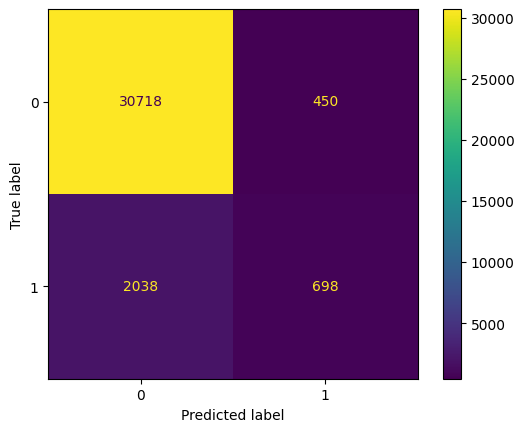

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
confusion = confusion_matrix(y_teste, y_pred)
disp = ConfusionMatrixDisplay(confusion)
disp.plot()

### Gerando as curvas ROC

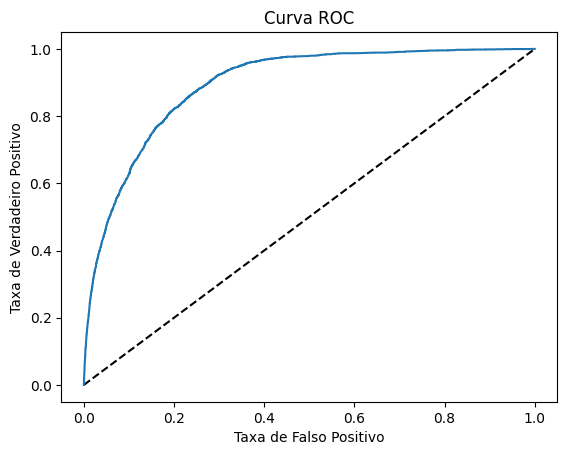

In [42]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
# Gera fpr, tpr e thresholds
fpr, tpr, thresholds = roc_curve(y_teste, y_proba_pred[:, 1])

# curva ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.show()

## Calculando AUC

In [43]:
from sklearn.metrics import auc
auc = auc(fpr, tpr)
print('Valor de AUC: {}'.format(auc))

Valor de AUC: 0.8935187217809238


### Podemos adicionar o valor de AUC ao gráfico com a curva ROC

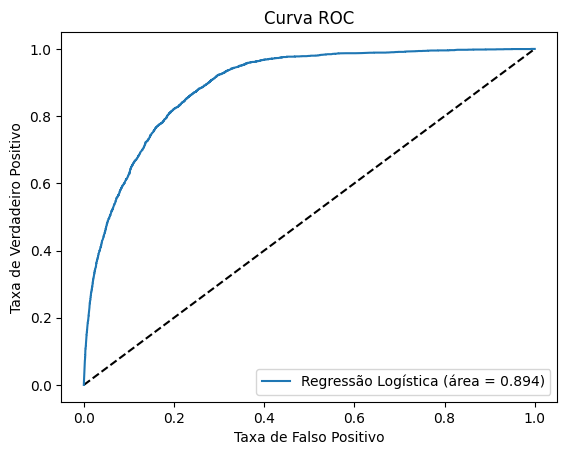

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score
# Gera fpr, tpr e thresholds
fpr, tpr, thresholds = roc_curve(y_teste, y_proba_pred[:, 1])
auc = roc_auc_score(y_teste, y_proba_pred[:, 1])

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Regressão Logística (área = %0.3f)' % auc)
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc='best')
plt.show()

## Podemos obter a razão de chances para cada variável.
Neste caso, a razão de chances indica as chances de ocorrer a classe positiva (óbito) para cada variável de interesse.

In [30]:
# obtendo os coeficientes
coeficientes = algoritmo.coef_

In [31]:
# exponenciação dos coeficientes gera as razões de chances
odds_ratio = np.exp(coeficientes)
odds_ratio

array([[0.72879509, 1.1411258 , 0.74520401, 1.09436697, 0.79891416,
        0.96254083, 0.22173282, 0.8634658 , 1.66868327, 1.88981201,
        1.21973153, 0.73630617, 1.0827566 , 0.87629055, 0.93400443,
        1.81806576, 0.5224181 , 0.8052564 , 0.84024547, 0.91595425,
        0.43962527, 0.78886567, 1.78701599, 1.09464442, 0.96697415,
        0.58549908, 1.20924401, 0.89251679, 0.57422726, 0.64370974,
        0.50097344, 1.92180519, 0.92154314, 0.67250958, 1.00009095,
        0.70128943, 0.88364405, 3.33894368, 0.60221679, 0.33293713,
        0.925742  , 0.7284039 , 0.8975833 , 1.86552419, 0.86882192,
        0.57740348, 1.0128755 , 0.86055962, 0.61051065, 1.92804414,
        0.5287416 , 1.15712289, 0.76230659, 0.89149177, 0.91194183,
        0.81613751, 0.7593654 , 0.43706727, 1.32291021, 3.18938481,
        5.45972601, 9.27206188]])

In [32]:
X_teste.columns

Index(['CS_SEXO_F', 'CS_SEXO_I', 'CS_SEXO_M', 'CS_GESTANT_0', 'CS_GESTANT_1',
       'CS_GESTANT_2', 'CS_GESTANT_3', 'CS_GESTANT_4', 'CS_GESTANT_5',
       'CS_GESTANT_6', 'CS_GESTANT_9', 'CS_RACA_1', 'CS_RACA_2', 'CS_RACA_3',
       'CS_RACA_4', 'CS_RACA_5', 'CS_RACA_9', 'FEBRE_1.0', 'FEBRE_2.0',
       'FEBRE_9.0', 'TOSSE_1.0', 'TOSSE_2.0', 'TOSSE_9.0', 'DISPNEIA_1.0',
       'DISPNEIA_2.0', 'DISPNEIA_9.0', 'DESC_RESP_1.0', 'DESC_RESP_2.0',
       'DESC_RESP_9.0', 'SATURACAO_1.0', 'SATURACAO_2.0', 'SATURACAO_9.0',
       'FATOR_RISC_1', 'FATOR_RISC_2', 'UTI_1.0', 'UTI_2.0', 'UTI_9.0',
       'SUPORT_VEN_1.0', 'SUPORT_VEN_2.0', 'SUPORT_VEN_3.0', 'SUPORT_VEN_9.0',
       'PCR_RESUL_1.0', 'PCR_RESUL_2.0', 'PCR_RESUL_3.0', 'PCR_RESUL_4.0',
       'PCR_RESUL_5.0', 'PCR_RESUL_9.0', 'CLASSI_FIN_1.0', 'CLASSI_FIN_2.0',
       'CLASSI_FIN_3.0', 'CLASSI_FIN_4.0', 'CLASSI_FIN_5.0', 'VACINA_COV_1.0',
       'VACINA_COV_2.0', 'VACINA_COV_9.0', 'FNT_IN_COV_1', 'FNT_IN_COV_2',
       'Idade_1.0', '

# Otimização de hiperparâmetros

In [49]:
# importando o pacote
from sklearn.model_selection import GridSearchCV

In [59]:
# precisamos passar os hiperparâmetros que serão testados
hiperparametros = {'penalty': ['l2', 'l1'], 'solver': ['saga', 'lbfgs'], 'max_iter': [1,25,150]}

In [52]:
# definindo o algoritmo com os hiperparâmetros padrão
algoritmo = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=100)

In [56]:
# apicando a função Grid Search
escolha_hiperparametros = GridSearchCV(estimator=algoritmo, param_grid=hiperparametros, scoring='roc_auc')

In [58]:
import warnings

# Ignorar todos os warnings (não recomendado, use com cautela)
warnings.filterwarnings("ignore")

In [60]:
# aplicando a função sobre os dados de treinamento
escolha_hiperparametros.fit(X_treino, y_treino)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'max_iter': [1, 25, 150], 'penalty': ['l2', 'None'],
                         'solver': ['sag', 'saga', 'lbfgs']},
             scoring='roc_auc')

In [66]:
# vamos calcular a média do score de pontuação
media = escolha_hiperparametros.cv_results_['mean_test_score']
media = np.nanmean(media)
print('A média de escore de pontuação foi de: {}'.format(media))

A média de escore de pontuação foi de: 0.8692495529677685


In [68]:
# vamos calcular o desvio padrão do score de pontuação
dp = escolha_hiperparametros.cv_results_['std_test_score']
dp = np.nanstd(dp)
print('O desvio padrão médio de escore de pontuação foi de: {}'.format(dp))

O desvio padrão médio de escore de pontuação foi de: 0.0024481177467871726


### Vamos visualizar quais foram os melhores hiperparâmetros encontrados por esta função

In [69]:
escolha_hiperparametros.best_params_

{'max_iter': 25, 'penalty': 'l2', 'solver': 'saga'}

### Agora, vamos alterar os hiperparâmetros do nosso algoritmo com estes novos encontrados e visualizar se melhoramos nossos resultados

In [70]:
# definindo o algoritmo otimizado
algoritmo_otimizado = LogisticRegression(max_iter=25, penalty='l2', solver='saga', random_state=7)

In [71]:
# treinando o algoritmo otimizado
algoritmo_otimizado.fit(X_treino, y_treino)

LogisticRegression(max_iter=25, random_state=7, solver='saga')

In [72]:
# realizando as predições
y_pred_otimizado = algoritmo_otimizado.predict(X_teste)
y_pred_otimizado

array([0, 0, 0, ..., 0, 0, 0])

In [73]:
# obtendo as probabilidades de predições
y_probs_pred_otimizado = algoritmo_otimizado.predict_proba(X_teste)

In [74]:
# obtendo as métricas de performance
from sklearn.metrics import classification_report
print(classification_report(y_teste, y_pred_otimizado, target_names=['Cura', 'Óbito']))

              precision    recall  f1-score   support

        Cura       0.94      0.99      0.96     31168
       Óbito       0.61      0.26      0.36      2736

    accuracy                           0.93     33904
   macro avg       0.77      0.62      0.66     33904
weighted avg       0.91      0.93      0.91     33904



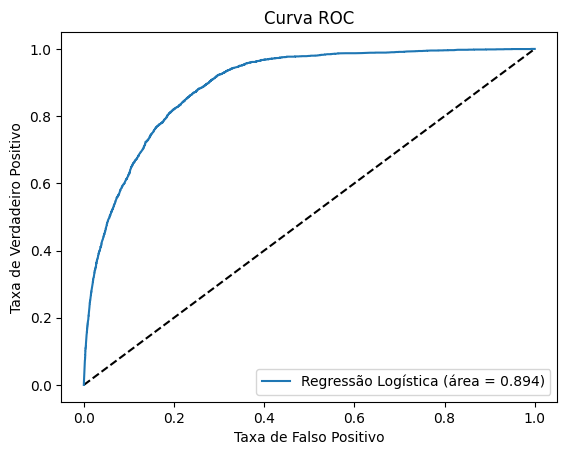

In [75]:
# obtendo a curva ROC
from sklearn.metrics import roc_curve, roc_auc_score
# Gera fpr, tpr e thresholds
fpr, tpr, thresholds = roc_curve(y_teste, y_probs_pred_otimizado[:, 1])
auc = roc_auc_score(y_teste, y_probs_pred_otimizado[:, 1])

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Regressão Logística (área = %0.3f)' % auc)
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc='best')
plt.show()

### Vamos balancear as classes

In [76]:
from imblearn.over_sampling import SMOTEN
smt = SMOTEN(sampling_strategy='not majority', random_state=7)
x_smote_treino, y_smote_treino = smt.fit_resample(X_treino, y_treino)

x_smote_treino = pd.DataFrame(x_smote_treino, columns=X_treino.columns)
x_smote_treino

print(x_smote_treino.isna().sum().sum())

0


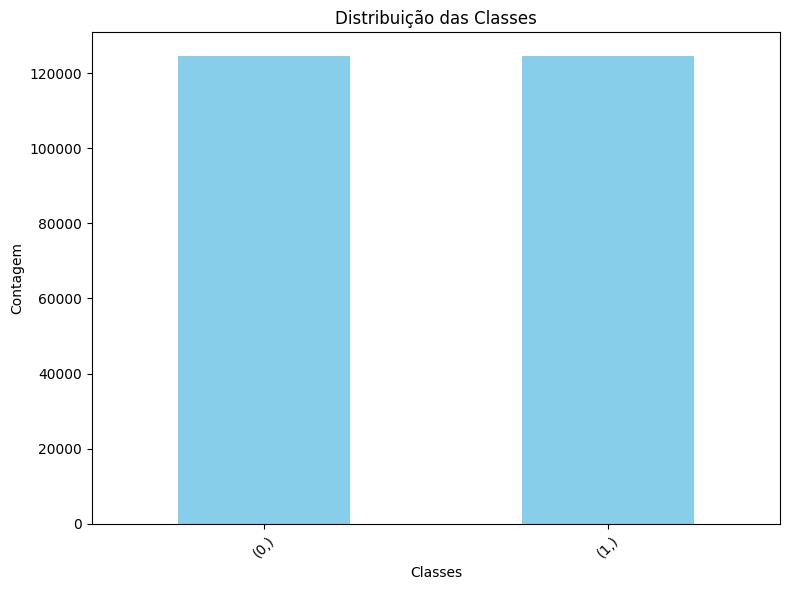

In [77]:
import matplotlib.pyplot as plt
class_column = 'EVOLUCAO'

y_smote_treino = pd.DataFrame(y_smote_treino)

# Calcule a contagem de cada classe
class_counts = y_smote_treino.value_counts()

# Crie um gráfico de barras das distribuições das classes
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Distribuição das Classes')
plt.xlabel('Classes')
plt.ylabel('Contagem')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()
plt.show()

In [78]:
# treinando o modelo
algoritmo.fit(x_smote_treino, y_smote_treino)

LogisticRegression()

In [80]:
y_pred_smote = algoritmo.predict(X_teste)
print(classification_report(y_teste, y_pred_smote, target_names=['Cura', 'Óbito']))

              precision    recall  f1-score   support

        Cura       0.97      0.87      0.91     31168
       Óbito       0.30      0.66      0.42      2736

    accuracy                           0.85     33904
   macro avg       0.63      0.76      0.66     33904
weighted avg       0.91      0.85      0.87     33904



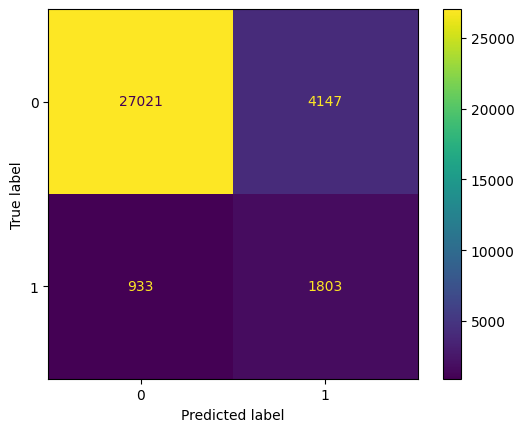

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz_confusao = confusion_matrix(y_teste, y_pred_smote)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao)
disp.plot()
plt.show()

In [85]:
# obtendo as probabilidades de predições
y_probs_pred_smote = algoritmo.predict_proba(X_teste)

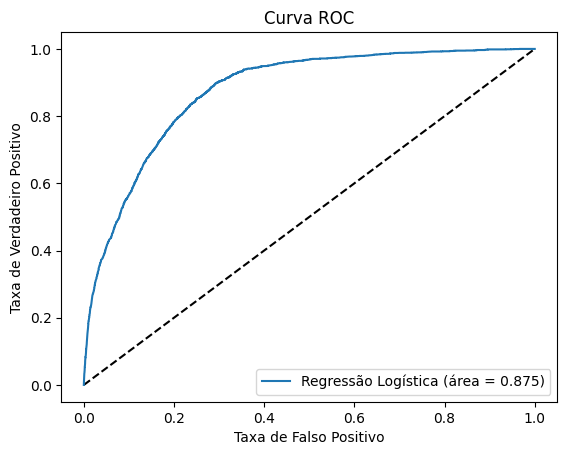

In [86]:
# obtendo a curva ROC
from sklearn.metrics import roc_curve, roc_auc_score
# Gera fpr, tpr e thresholds
fpr, tpr, thresholds = roc_curve(y_teste, y_probs_pred_smote[:, 1])
auc = roc_auc_score(y_teste, y_probs_pred_smote[:, 1])

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Regressão Logística (área = %0.3f)' % auc)
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc='best')
plt.show()

# Como vocês interpretariam este resultado de AUC?